In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Read in data

In [158]:
props = pd.read_csv('./datasets/test.csv')

In [4]:
props.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD
5,333,923228370,160,RM,21.0,1890,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,6,2010,WD
6,1327,902427150,20,RM,52.0,8516,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,5,2008,WD
7,858,907202130,20,RL,NaN,9286,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,10,2009,WD
8,95,533208090,160,FV,39.0,3515,Pave,Pave,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,1,2010,WD
9,1568,914476010,20,RL,75.0,10125,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,MnPrv,NaN,0,2,2008,WD


In [5]:
props.shape

(878, 80)

# Look at numeric vs categorical columns

## Numeric columns

In [93]:
initial_numeric_columns = props.select_dtypes(include = [np.number])

In [95]:
# initial_numeric_columns.to_csv('./datasets/initial_numeric_columns.csv', index = True)

## Non-numeric (presumably categorical) columns

In [96]:
initial_nonnumeric_columns = props.select_dtypes(exclude = [np.number])

In [143]:
#initial_nonnumeric_columns.to_csv('./datasets/initial_nonnumeric_columns.csv', index = True)

In [141]:
unique_values_per_nonnumeric_column = [(column, len(initial_nonnumeric_columns[column].unique())) for column in initial_nonnumeric_columns.columns]

In [144]:
unique_values_per_nonnumeric_column

[('MS Zoning', 6),
 ('Street', 2),
 ('Alley', 3),
 ('Lot Shape', 4),
 ('Land Contour', 4),
 ('Utilities', 2),
 ('Lot Config', 5),
 ('Land Slope', 3),
 ('Neighborhood', 26),
 ('Condition 1', 9),
 ('Condition 2', 3),
 ('Bldg Type', 5),
 ('House Style', 8),
 ('Roof Style', 6),
 ('Roof Matl', 6),
 ('Exterior 1st', 13),
 ('Exterior 2nd', 16),
 ('Mas Vnr Type', 6),
 ('Exter Qual', 4),
 ('Exter Cond', 5),
 ('Foundation', 6),
 ('Bsmt Qual', 6),
 ('Bsmt Cond', 4),
 ('Bsmt Exposure', 5),
 ('BsmtFin Type 1', 7),
 ('BsmtFin Type 2', 7),
 ('Heating', 4),
 ('Heating QC', 4),
 ('Central Air', 2),
 ('Electrical', 5),
 ('Kitchen Qual', 5),
 ('Functional', 6),
 ('Fireplace Qu', 6),
 ('Garage Type', 7),
 ('Garage Finish', 4),
 ('Garage Qual', 5),
 ('Garage Cond', 6),
 ('Paved Drive', 3),
 ('Pool QC', 3),
 ('Fence', 5),
 ('Misc Feature', 4),
 ('Sale Type', 10)]

In [182]:
possible_bools = [ (column, counts) for column, counts in unique_values_per_nonnumeric_column if counts == 2 ]
possible_bools

[('Street', 2), ('Utilities', 2), ('Central Air', 2)]

## Transform Street into a bool called Paved Street

In [188]:
props['Street'].value_counts()

In [159]:
props['Street'] = props['Street'].str.contains('Pave').astype(int)

In [160]:
props.rename({'Street' : 'Paved Street'}, axis = 1, inplace = True)

In [187]:
props.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Paved Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,1,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,1,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,1,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,1,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,1,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


## Transform Utilities into a bool called Has All Utilities

Went this route because there is only one single row without all utilities

In [180]:
props['Utilities'].value_counts()

AllPub    877
NoSewr      1
Name: Utilities, dtype: int64

In [189]:
props['Utilities'] = props['Utilities'].str.contains('AllPub').astype(int)

In [190]:
props.rename({'Utilities' : 'Has All Utilities'}, axis = 1, inplace = True)

## Transform Central Air into a bool


In [193]:
props['Central Air'].value_counts()

1    823
0     55
Name: Central Air, dtype: int64

In [192]:
props['Central Air'] = props['Central Air'].str.contains('').astype(int)

In [194]:
props.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Paved Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,1,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,1,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,1,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,1,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,1,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


Look for missing categorical data

<Axes: >

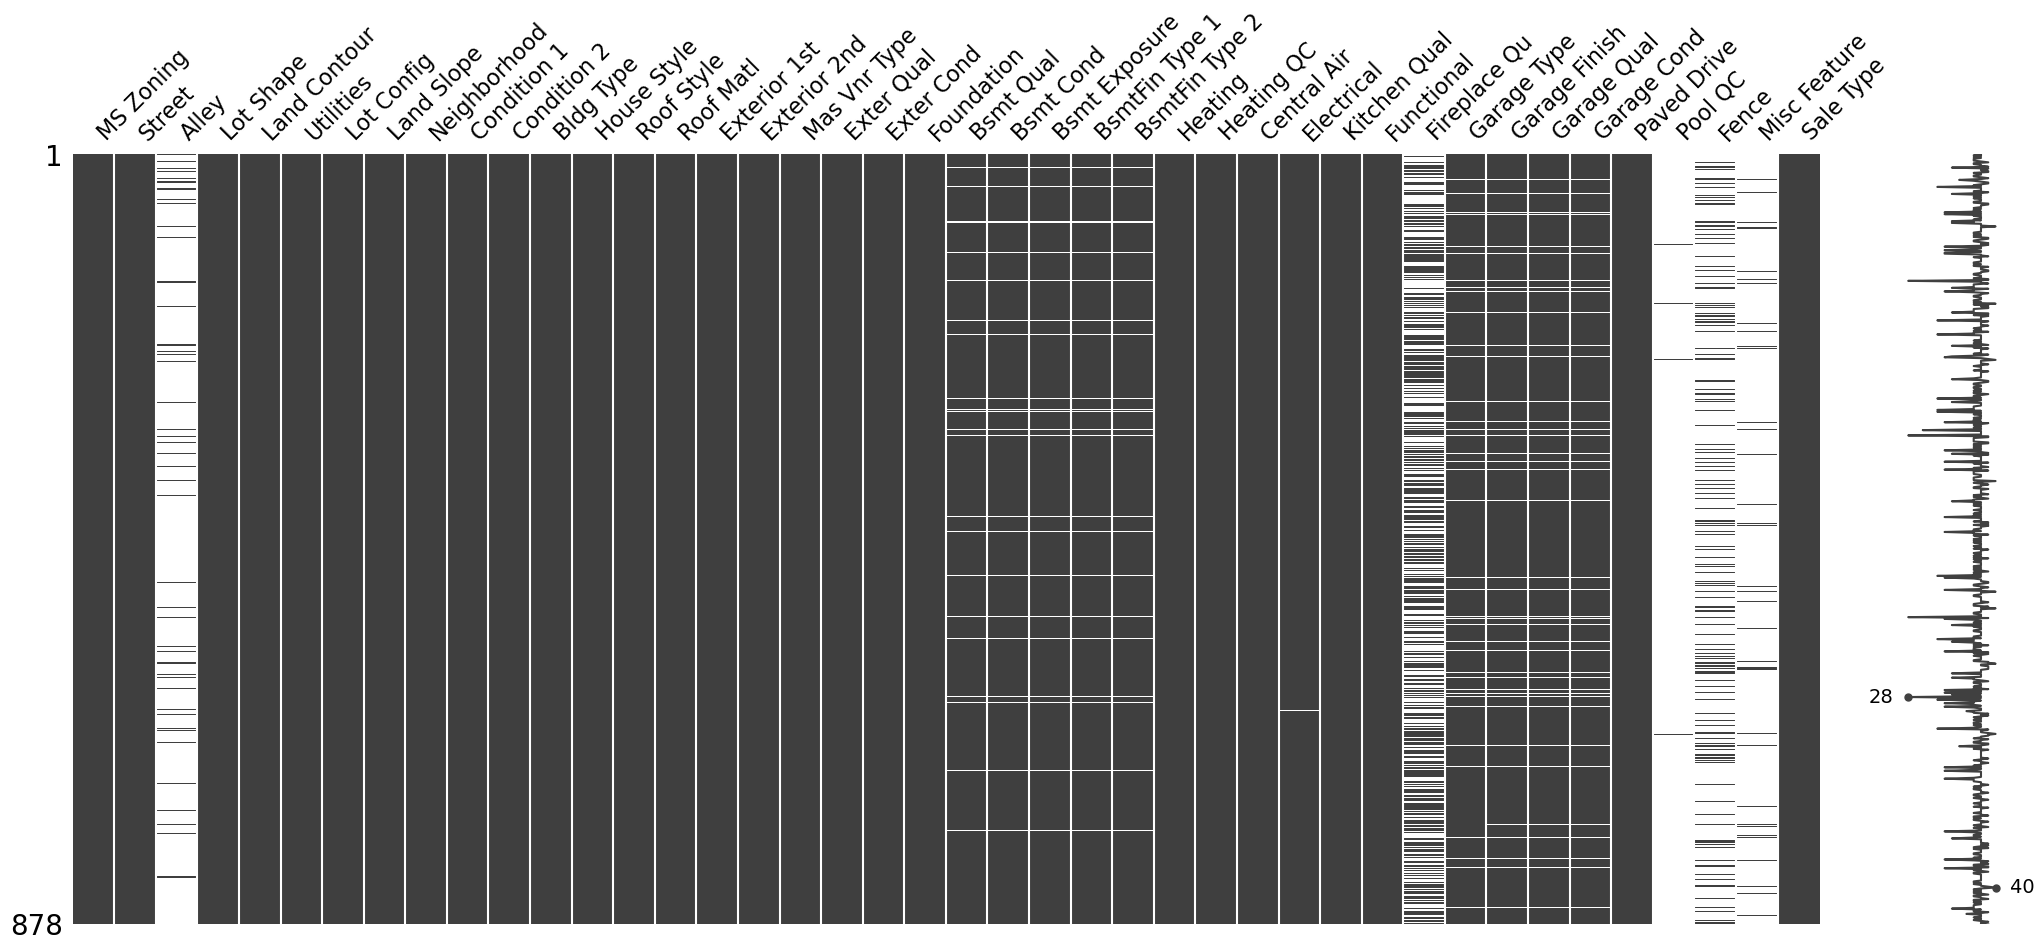

In [195]:
msno.matrix(initial_nonnumeric_columns)